In [ ]:
import numpy as np
import scipy.stats as sct
gamma = 0.05
alpha_hypothesis = 1
ro = 2
sample_size = {
    "small": 1000,
    "medium": 10000,
    "big": 100000
}



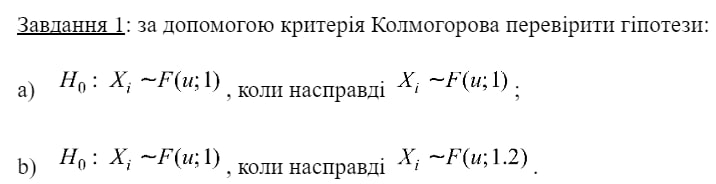

In [ ]:
def kolmogorov_criterion(sample, alpha_hypothesis, gamma, ro):
    sample_size = len(sample)
    sorted_sample = np.sort(sample)
    z = sct.kstwobign.ppf(1-gamma)
    D = -np.inf
    for (k,value) in enumerate(sorted_sample):
        exp_value = sct.expon.cdf(value, scale = alpha_hypothesis)
        D = max(D, exp_value - k / sample_size, (k+1) / sample_size - exp_value)
    D *= np.sqrt(sample_size)
    print(f' D = {D}')
    print(f' z = {z}')
    return D < z



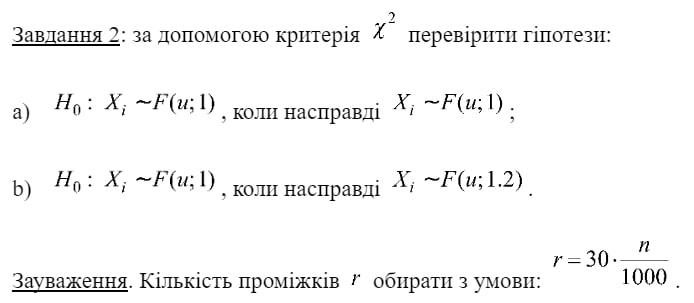

In [ ]:
def chi_square_criterion(sample, alpha_hypothesis, gamma, ro):
    sample_size = len(sample)

    r = 30 * sample_size // 1000
    z = sct.chi2.ppf(1 - gamma, r - 1)

    edges = [sct.expon.ppf(i / r, scale = alpha_hypothesis) for i in range(0, r + 1)]

    def getIntervalIndex(value):
    for(index, edge) in enumerate(edges):
        if (value > edge and value < edges[index + 1]): return index

    v = np.zeros(r)

    for value in sample:
        v[getIntervalIndex(value)] += 1

    delta = sum([elem ** 2 for elem in v]) * r / sample_size - sample_size

    print(f' delta = {delta}')
    print(f' z = {z}')

    return delta < z




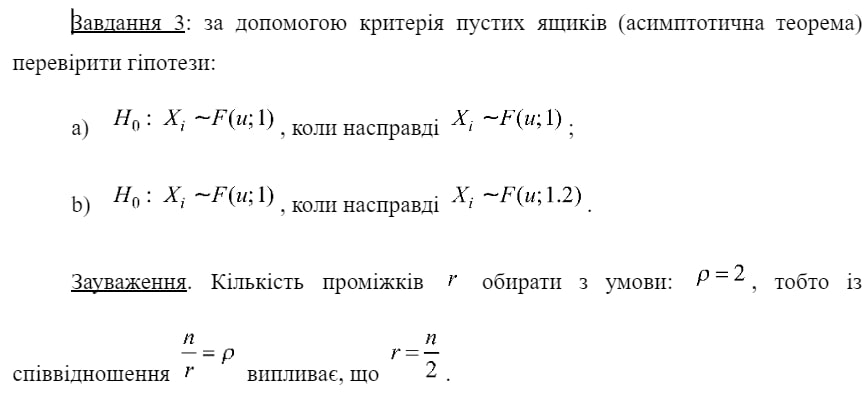

In [ ]:
def empty_boxes_criterion(sample, alpha_hypothesis, gamma, ro):
    sample_size = len(sample)

    r = sample_size // ro

    v = np.zeros(r)

    for value in sample:
        v[int(sct.expon.cdf(value, scale = alpha_hypothesis) * r)] += 1

    empty_box_count = sum([(1 if elem == 0 else 0) for elem in v])

    temp = np.e ** (-ro)
    z = r * temp + sct.norm.ppf(1 - gamma) * np.sqrt(r * temp * (1 - (1 + ro) * temp))
 
    print(f' Count of empty boxes = {empty_box_count}')
    print(f' z = {z}')

    return empty_box_count < z



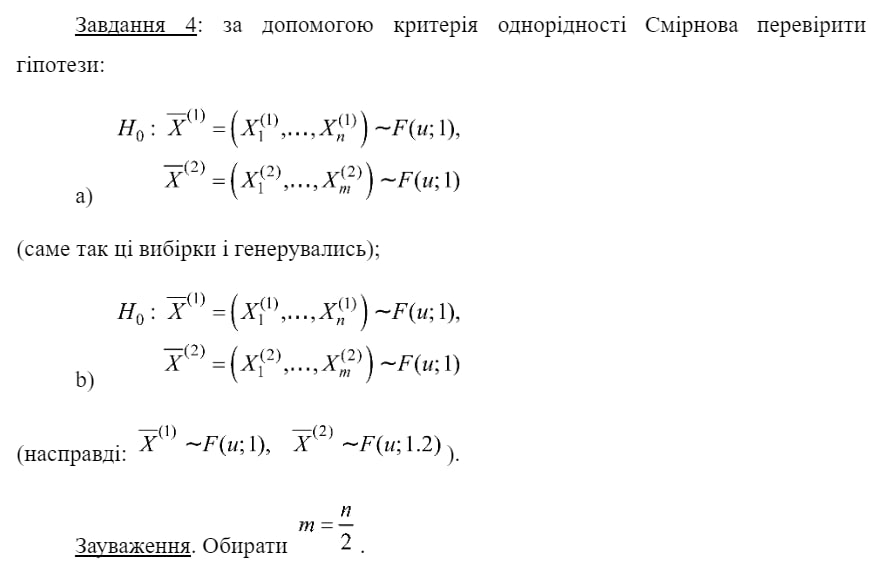

In [ ]:
def smirnov_criterion(sample_n, sample_m, alpha_n, gamma):
    sample_n_size = len(sample_n)
    sample_m_size = len(sample_m)

    z = sct.kstwobign.ppf(1 - gamma)

    D = -np.inf

    for (k, value) in enumerate(np.sort(sample_m)):
        exp_value = sct.expon.cdf(value, scale = alpha_n)

        D = max(D, exp_value - k / sample_m_size, (k + 1) / sample_m_size - exp_value)

    D /= np.sqrt(1 / sample_n_size + 1 / sample_m_size)

    print(f' D = {D}')
    print(f' z = {z}')

    return D < z



In [ ]:
def uniformity_test(sample, gamma):
    sample_size = len(sample)

    r = 30 * sample_size //1000
    z = sct.chi2.ppf(1 - gamma, r - 1)

    v = np.zeros(r)

    for value in sample:
        v[int(sct.expon.cdf(value) * r)] += 1

    delta = sum([elem ** 2 for elem in v]) * r / sample_size - sample_size

    return delta < z



In [ ]:
def get_exp_sample(size, alpha = alpha_hypothesis):
    sample = np.random.exponential(size = size, scale = 1 / alpha)

  # while(uniformity_test(sample, 0.1)):
  #   sample = np.random.exponential(size = size, scale = 1 / alpha)

    return sample

def get_report(sample_cardinality, criterion, gamma, alpha_real, alpha_hypothesis):
    sample = get_exp_sample(sample_cardinality, alpha_real)

    print(f'1. Sample cardinality = {sample_cardinality}')
    print(f'2. Real Distribution ~ exp({alpha_real})')
    print(f'3. Hypothetical Distribution ~ exp({alpha_hypothesis})')
    print(f'4. Criterion result = {criterion(sample, alpha_hypothesis, gamma, ro)}')
    print('--------------------------------------------')

def get_smirnov_report(sample_n_cardinality, sample_m_cardinality, gamma, alpha_n, alpha_m):
    sample_n = get_exp_sample(sample_n_cardinality, alpha_n)
    sample_m = get_exp_sample(sample_m_cardinality, alpha_m)

    print(f'1. Sample_n cardinality = {sample_n_cardinality}')
    print(f'2. Sample_m cardinality = {sample_m_cardinality}')
    print(f'3. Sample_n Distribution ~ exp({alpha_n})')
    print(f'4. Sample_m Distribution ~ exp({alpha_m})')
    print(f'5. Criterion result = {smirnov_criterion(sample_n, sample_m, alpha_n, gamma)}')
    print('--------------------------------------------')

In [ ]:
print('---------------- TASK 1 ----------------')
print("Kolmogorov's criterion")
print("First part")
get_report(sample_size["small"], kolmogorov_criterion, gamma, 1, 1)
get_report(sample_size["medium"], kolmogorov_criterion, gamma, 1, 1)
get_report(sample_size["big"], kolmogorov_criterion, gamma, 1, 1)
print('----------------------------------------')
print("Second part")
get_report(sample_size["small"], kolmogorov_criterion, gamma, 1, 1.2)
get_report(sample_size["medium"], kolmogorov_criterion, gamma, 1, 1.2)
get_report(sample_size["big"], kolmogorov_criterion, gamma, 1, 1.2)
print('----------------------------------------')
print('---------------- TASK 2 ----------------')
print("Chi-Squared criterion")
print("First part")
get_report(sample_size["small"], chi_square_criterion, gamma, 1, 1)
get_report(sample_size["medium"], chi_square_criterion, gamma, 1, 1)
get_report(sample_size["big"], chi_square_criterion, gamma, 1, 1)
print('----------------------------------------')
print("Second part")
get_report(sample_size["small"], chi_square_criterion, gamma, 1, 1.2)
get_report(sample_size["medium"], chi_square_criterion, gamma, 1, 1.2)
get_report(sample_size["big"], chi_square_criterion, gamma, 1, 1.2)
print('----------------------------------------')
print('---------------- TASK 3 ----------------')
print("Empty-Boxes criterion")
print("First part")
get_report(sample_size["small"], empty_boxes_criterion, gamma, 1, 1)
get_report(sample_size["medium"], empty_boxes_criterion, gamma, 1, 1)
get_report(sample_size["big"], empty_boxes_criterion, gamma, 1, 1)
print('----------------------------------------')
print("Second part")
get_report(sample_size["small"], empty_boxes_criterion, gamma, 1, 1.2)
get_report(sample_size["medium"], empty_boxes_criterion, gamma, 1, 1.2)
get_report(sample_size["big"], empty_boxes_criterion, gamma, 1, 1.2)
print('----------------------------------------')
print('---------------- TASK 4 ----------------')
print("Smirnov's criterion")
print("First part")
get_smirnov_report(sample_size["small"], sample_size["small"] // 2, gamma, 1, 1)
get_smirnov_report(sample_size["medium"], sample_size["medium"] // 2, gamma, 1, 1)
get_smirnov_report(sample_size["big"], sample_size["big"] // 2, gamma, 1, 1)
print('----------------------------------------')
print("Second part")
get_smirnov_report(sample_size["small"], sample_size["small"] // 2, gamma, 1, 1.2)
get_smirnov_report(sample_size["medium"], sample_size["medium"] // 2, gamma, 1, 1.2)
get_smirnov_report(sample_size["big"], sample_size["big"] // 2, gamma, 1, 1.2)
print('----------------------------------------').
